In [38]:
%matplotlib inline

import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import os
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn.tree as tree
import theano as thno
import theano.tensor as T
import sklearn.model_selection as cross_validation

from collections import OrderedDict
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from scipy.optimize import fmin_powell
from scipy import integrate


In [39]:
df = pd.read_csv(r"C:\Users\Griz\CSV\adult.csv")
df.shape

(48842, 15)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [41]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Описание датасета

1. 'age' - возраст (continuous).
2. 'workclass' - рабочий класс (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).
3. 'fnlwgt' - continuous(final weight).
4. 'education' - образование, Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. 'education-num' - (continuous).
6. 'marital-status' - семейное положение, Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. 'occupation' - профессия, ech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. 'relationship' - отношения, Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. 'race' - раса, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. 'gender' - пол, Female, Male.
11. 'capital-gain' - прирост средств, continuous.
12. 'capital-loss' - убыток, continuous.
13. 'hours-per-week' - часов в неделю, continuous.
14. 'native-country' - Родная страна, United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. 'income' - доход, >50K, <=50K.

Мы выбираем числовые столбцы с помощью функции select_dtypes.

In [42]:
num_attributes = df.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


1. 'age' возраст
2. 'fnlwgt' масса выборки (не связана с целевым переменным доходом и будет удалена до построения модели)
3. 'education-num' количество лет обучения
4. 'capital-gain' доход от источников инвестиций, отличных от заработной платы
5. 'capital-loss' убыток от источников инвестиций, отличных от заработной платы
6. 'hours-per-week' время работы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A84D097C48>,
      dtype=object)

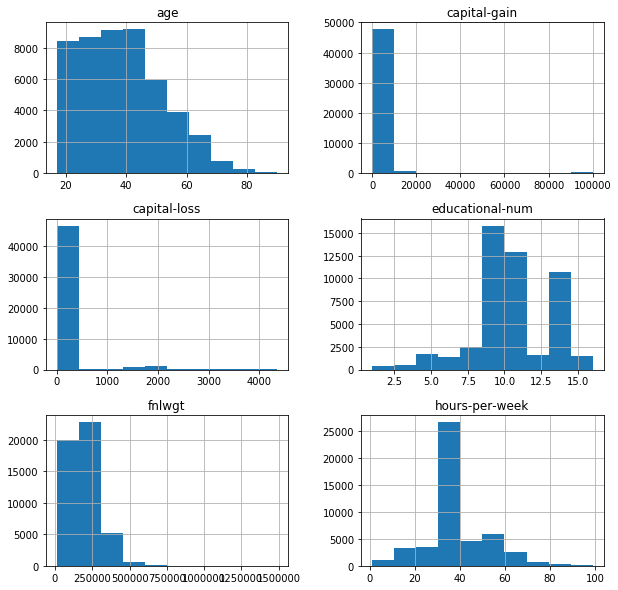

In [43]:
num_attributes.hist(figsize=(10,10))

In [44]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Не в одном из атрибутов нету пропущеных значений.

А так как значения разняца, а многие модели машинного обучения требуют, чтобы значения находились на одной шкале. Для масштабирования функций мы будем использовать стандартную шкалу из библиотеки sklearn.

In [45]:
cat_attributes = df.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


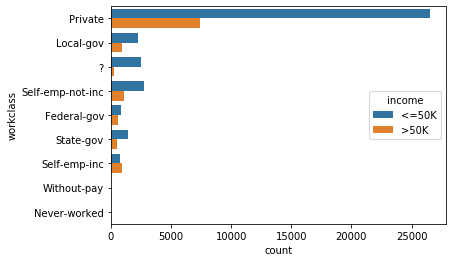

In [46]:
sns.countplot(y='workclass', hue='income', data = cat_attributes)

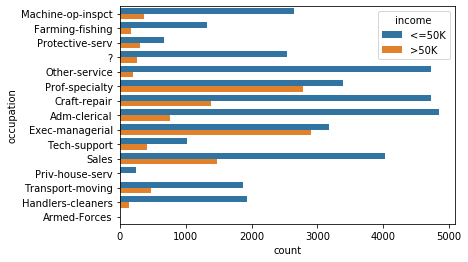

In [47]:
sns.countplot(y='occupation', hue='income', data = cat_attributes)

Мы отбросим колонку "образование".

В столбцах workclass, occupation, native-country есть пустые значения. Мы заменим отсутствующие значения в каждом столбце наиболее часто встречающимся значением этого столбца.

Так как sklearn не дает управление фреймами на прямую. Мы напишем свой который будет выбирать соответсвующие атрибуты (либо числовые, либо категориальные)

In [48]:
class ColumnsSelector(BaseEstimator, TransformerMixin):
  
  def __init__(self, type):
    self.type = type
  
  def fit(self, X, y=None):
    return self
  
  def transform(self,X):
    return X.select_dtypes(include=[self.type])

In [49]:
num_pipeline = Pipeline(steps=[
    ("num_attr_selector", ColumnsSelector(type='int')),
    ("scaler", StandardScaler())
])

In [50]:
#заменим недостающие значения в категориальных столбцах.
class CategoricalImputer(BaseEstimator, TransformerMixin):
  
  def __init__(self, columns = None, strategy='most_frequent'):
    self.columns = columns
    self.strategy = strategy
    
    
  def fit(self,X, y=None):
    if self.columns is None:
      self.columns = X.columns
    
    if self.strategy is 'most_frequent':
      self.fill = {column: X[column].value_counts().index[0] for 
        column in self.columns}
    else:
      self.fill ={column: '0' for column in self.columns}
      
    return self
      
  def transform(self,X):
    X_copy = X.copy()
    for column in self.columns:
      X_copy[column] = X_copy[column].fillna(self.fill[column])
    return X_copy

In [51]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
  
  def __init__(self, dropFirst=True):
    self.categories=dict()
    self.dropFirst=dropFirst
    
  def fit(self, X, y=None):
    join_df = pd.concat([df])
    join_df = join_df.select_dtypes(include=['object'])
    for column in join_df.columns:
      self.categories[column] = join_df[column].value_counts().index.tolist()
    return self
    
  def transform(self, X):
    X_copy = X.copy()
    X_copy = X_copy.select_dtypes(include=['object'])
    for column in X_copy.columns:
      X_copy[column] = X_copy[column].astype({column:
                CategoricalDtype(self.categories[column])})
    return pd.get_dummies(X_copy, drop_first=self.dropFirst)

In [52]:
cat_pipeline = Pipeline(steps=[
    ("cat_attr_selector", ColumnsSelector(type='object')),
    ("cat_imputer", CategoricalImputer(columns=
          ['workClass','occupation', 'native-country'])),
    ("encoder", CategoricalEncoder(dropFirst=True))
])

Заканчиваем наши pipeline путем объединения их с помощью FeatureUnion

In [53]:
full_pipeline = FeatureUnion([("num_pipe", num_pipeline), 
                ("cat_pipeline", cat_pipeline)])

In [54]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [55]:
#подготовим мобель одбросив ненужные столбцы
df.drop(['fnlwgt', 'educational-num'], axis=1, inplace=True)

In [56]:
# сделаем копию и разделим целевые значения и вектора.
train_copy = df.copy()
train_copy["income"] = train_copy["income"].apply(lambda x:0 if 
                        x=='<=50K' else 1)
X_train = train_copy.drop('income', axis =1)
Y_train = train_copy['income']

In [57]:
#теперь передадим наши pipeline
X_train_processed=full_pipeline.fit_transform(X_train)
model = LogisticRegression(random_state=0)
model.fit(X_train_processed, Y_train)

ValueError: Found array with 0 feature(s) (shape=(48842, 0)) while a minimum of 1 is required by StandardScaler.

In [58]:
test_copy = df.copy()
test_copy["income"] = test_copy["income"].apply(lambda x:0 if 
                      x=='<=50K.' else 1)
X_test = test_copy.drop('income', axis =1)
Y_test = test_copy['income']

In [59]:
X_test_processed = full_pipeline.fit_transform(X_test)
predicted_classes = model.predict(X_test_processed)

ValueError: Found array with 0 feature(s) (shape=(48842, 0)) while a minimum of 1 is required by StandardScaler.

In [ ]:
accuracy_score(predicted_classes, Y_test.values)